Gaussian Diffusion spectral fits

adding absolute percent difference

and adding bland altman as a percent 

In [32]:
import numpy as np
import matplotlib
import matplotlib.pyplot as pl
%matplotlib inline
import csv

import scipy.optimize as op
import scipy.stats
from scipy.optimize import curve_fit
import scipy.io
from scipy.stats import rice

import random
import pickle
import seaborn as sns

import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats, wilcoxon,ttest_rel, pearsonr,shapiro,f_oneway, ranksums
from scipy.special import stdtr
import csv
import pandas as pd

from scipy.integrate import quad
import sys 
import os
#sys.path.append(os.path.abspath("/Users/neuroimaging/Desktop/MR-code/Python_Code"))

#from ML_UsefulFunctions import *
#from KidneyROIAnalyses import *

from scipy import special

from scipy.integrate import tplquad

pd.options.display.float_format = '{:.3f}'.format

from sklearn.metrics import r2_score


from sklearn.feature_selection import SequentialFeatureSelector

import warnings
warnings.simplefilter("ignore")


from EllipsoidalSimulationCode import *

from statistics import mean

pl.rcParams["font.family"] = "Times New Roman"


def func(x,m,b):
    return m*x + b


def biexp_func(b, frac_fast,frac_slow,diff_fast,diff_slow):
    Data = frac_slow*np.exp(-b*diff_slow)+frac_fast*np.exp(-b*diff_fast)
    normal = frac_slow+frac_fast
    return Data/normal

def monoexp_func(b, frac, diff):
    Data = frac*np.exp(-b*diff)
    return Data

In [34]:
def CalculatePE_fraction(df, trait):
    df[trait + ' PE'] = (df['Fit ' + trait]-df['true ' + trait])#*100/(df['true ' + trait])
    return df

def CalculatePE_diffusion(df, trait): #scale by 1000
    df[trait + ' PE'] = ((df['Fit ' +trait]/1000)-df['true ' + trait])#*100/(df['true ' + trait])
    return df

In [36]:
b = [0,10,30,50,80,120,200,400,800]

In [38]:
pl.rcParams["font.family"] = "serif"
pl.rcParams["mathtext.fontset"] = "dejavuserif"
matplotlib.rcParams.update({'font.size': 18})

In [40]:
def blandalt_calc(FitfDs,TruefDs, name):
    mean_diff = np.mean(FitfDs-TruefDs)
    mean_diff_percent = 100*mean_diff/np.mean((FitfDs+TruefDs)/2)
    std_diff = np.std(FitfDs-TruefDs)
    std_diff_percent = 100*std_diff/np.mean((FitfDs+TruefDs)/2)
    lower_bound=mean_diff-(std_diff*1.96)
    upper_bound=mean_diff+(std_diff*1.96)
    lower_bound_percent=mean_diff_percent-(1.96*std_diff_percent)
    upper_bound_percent=mean_diff_percent+(1.96*std_diff_percent)
    print(f'{name} BA, {mean_diff:.3f}, [{lower_bound:.3f}-{upper_bound:.3f}]')
    print(f'{name} %BA, {mean_diff_percent:.3f}%, [{lower_bound_percent:.3f}%-{upper_bound_percent:.3f}%]\n')
    return
    
    

# Spectral Gaussian 3 component

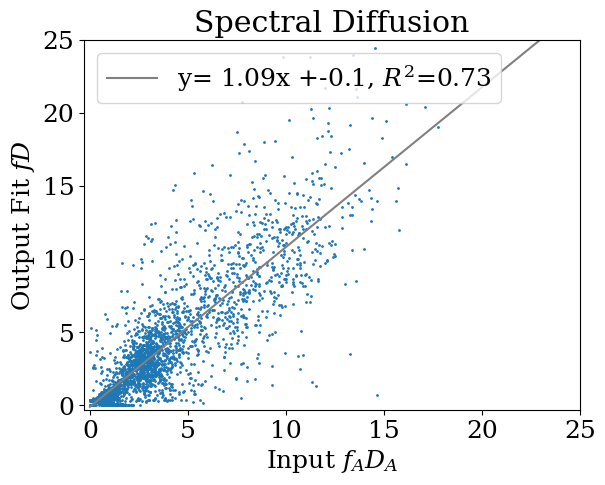

SignificanceResult(statistic=0.8496814781850222, pvalue=0.0)
All fD difference = 0.23492 ± 2.15841, -4.21064%
fast fD difference = 1.09220 ± 3.19316, 14.62423%
med fD difference = 0.03226 ± 1.51035, 2.92935%
slow fD difference = -0.41971 ± 0.54240, -33.97344%
relative percent difference
fast fD  13.62769%
med fD 2.88704%
slow fD -40.92533%

relative abs percent difference
fast fD  28.29345%
med fD 28.09720%
slow fD 51.67845%

percent bland altman
fast fD BA, 1.092, [-5.166-7.351]
fast fD %BA, 14.686%, [-69.470%-98.843%]

med fD BA, 0.032, [-2.928-2.993]
med fD %BA, 1.059%, [-96.106%-98.223%]

slow fD BA, -0.420, [-1.483-0.643]
slow fD %BA, -61.076%, [-215.780%-93.627%]

all fD BA, 0.235, [-3.996-4.465]
all fD %BA, 6.309%, [-107.305%-119.922%]



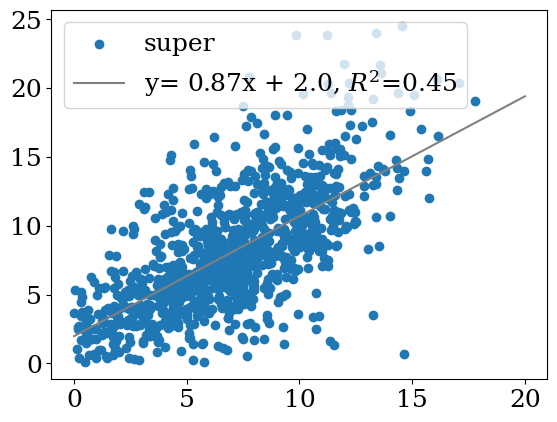

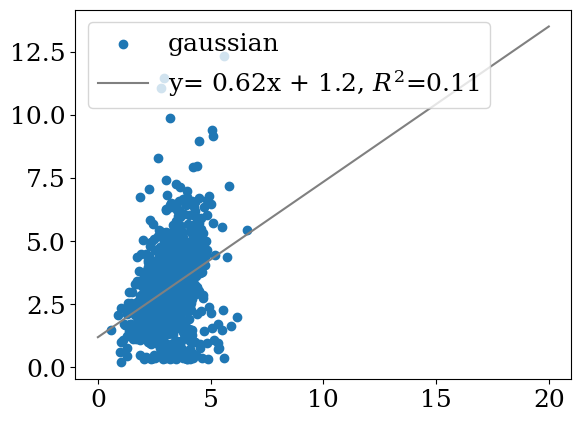

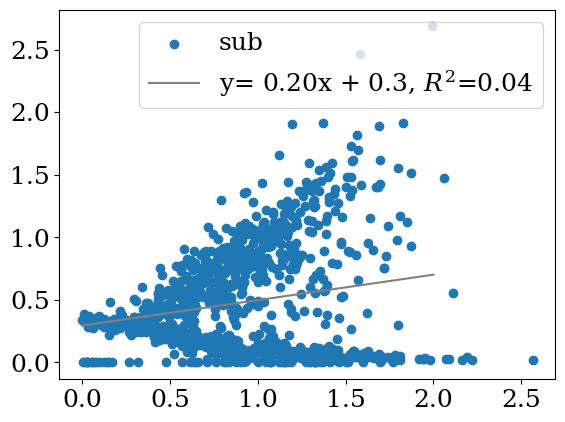

0.9968591661755263 0.011875449004987961
2.949 0.21999772726098588
now just f and D independently


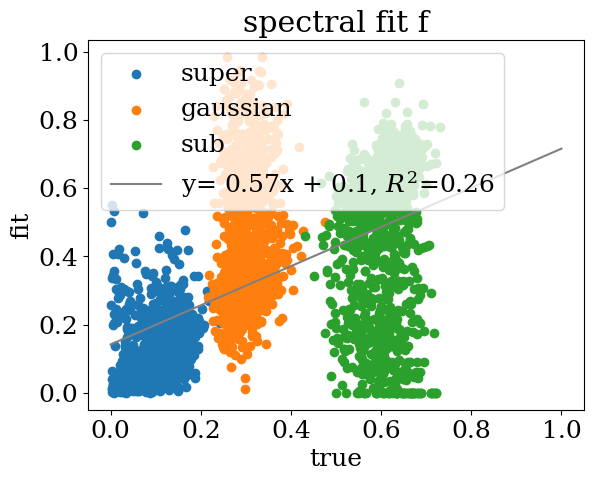

relative percent difference
fast f  3.17922%
med f 19.90157%
slow f -13.32373%

relative abs percent difference
fast f  49.81642%
med f 29.41611%
slow f 18.59782%

percent bland altman
fast f BA, 0.023, [-0.160-0.206]
fast f %BA, 21.058%, [-145.956%-188.072%]

med f BA, 0.139, [-0.245-0.523]
med f %BA, 37.467%, [-66.051%-140.984%]

slow f BA, -0.162, [-0.621-0.297]
slow f %BA, -31.171%, [-119.542%-57.199%]



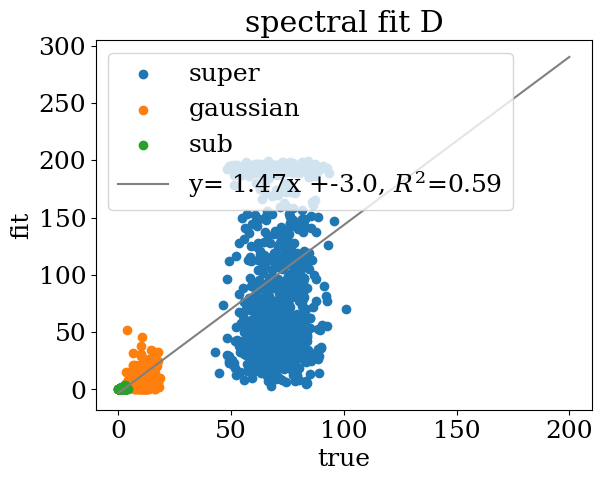

relative percent difference
fast D  11.26372%
med D -27.98006%
slow D -27.04591%

relative abs percent difference
fast D  62.36505%
med D 44.46094%
slow D 35.06845%

percent bland altman
fast D BA, 31.065, [-97.494-159.625]
fast D %BA, 36.170%, [-113.512%-185.851%]

med D BA, -1.465, [-12.902-9.972]
med D %BA, -15.733%, [-138.536%-107.070%]

slow D BA, -0.583, [-1.981-0.814]
slow D %BA, -48.597%, [-165.006%-67.812%]



In [45]:
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExpSimulatedCurves_anomalous_12172024_3comp.xlsx'
Truth = pd.read_excel(fileloc,sheet_name = 'Parameters') 
Truth=Truth.rename(columns={c: 'true '+c for c in Truth.columns if c not in ['Run Number', 'Unnamed']})
Truth=Truth.rename(columns={c: c+'tion' for c in Truth.columns if 'frac' in c})
#Truth=Truth.rename(columns={c: 'diffusion' for c in Truth.columns if ' D' in c})

fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/Simulated_3peak_AnomalousDiffusionSpectra_Fits_rerun.xlsx'
TrueDataFits = pd.read_excel(fileloc,sheet_name = 'lmd_01_AveragedNoise_SNR_50') #s means sorted
TrueDataFits=TrueDataFits.rename(columns={c: 'Fit '+c for c in TrueDataFits.columns if c not in ['Run Number', 'Unnamed']})

df_AveragedData = pd.merge(Truth, TrueDataFits, how = 'inner', left_on=["Run Number"], right_on = ['Run Number'])
df_AveragedData['Fit slow diffusion'] = df_AveragedData['Fit slow diffusion'].fillna(0)


TruefastfDs = 1000*df_AveragedData['true fast fraction']*df_AveragedData['true fast diffusion']#**(1/df_AveragedData['true fast gamma']))
TruemedfDs = 1000*df_AveragedData['true med fraction']*df_AveragedData['true med diffusion']#**(1/df_AveragedData['true med gamma']))
TrueslowfDs = 1000*df_AveragedData['true slow fraction']*df_AveragedData['true slow diffusion']#**(1/df_AveragedData['true slow gamma']))

FitfastfDs = df_AveragedData['Fit fast fraction']*df_AveragedData['Fit fast diffusion']
FitmedfDs = df_AveragedData['Fit med fraction']*df_AveragedData['Fit med diffusion']
FitslowfDs = df_AveragedData['Fit slow fraction']*df_AveragedData['Fit slow diffusion']



#pl.scatter(TruefastfDs,FitfastfDs,label='super')
#pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
#pl.scatter(TrueslowfDs,FitslowfDs,label='sub')


AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))

pl.scatter(AllTruefD, allFitfD, s=1)
x = np.linspace(0,25,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('Spectral Diffusion')
pl.xlabel('Input $f_AD_A$')
pl.ylabel('Output Fit $fD$')
pl.xlim(-0.3,25)
pl.ylim(-0.3,25)
pl.show()


print(scipy.stats.spearmanr(AllTruefD,allFitfD))
print(f'All fD difference = {np.mean(allFitfD - AllTruefD):.5f} ± {np.std(allFitfD - AllTruefD):.5f}, {100*np.median((allFitfD - AllTruefD)/AllTruefD):.5f}%')
print(f'fast fD difference = {np.mean(FitfastfDs - TruefastfDs):.5f} ± {np.std(FitfastfDs - TruefastfDs):.5f}, {100*np.median((FitfastfDs - TruefastfDs)/TruefastfDs):.5f}%')
print(f'med fD difference = {np.mean(FitmedfDs - TruemedfDs):.5f} ± {np.std(FitmedfDs - TruemedfDs):.5f}, {100*np.median((FitmedfDs - TruemedfDs)/TruemedfDs):.5f}%')
print(f'slow fD difference = {np.mean(FitslowfDs - TrueslowfDs):.5f} ± {np.std(FitslowfDs - TrueslowfDs):.5f}, {100*np.median((FitslowfDs - TrueslowfDs)/TrueslowfDs):.5f}%')


print('relative percent difference')
print(f'fast fD  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow fD {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


print('\nrelative abs percent difference')
print(f'fast fD  {200*np.median(abs(FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.median(abs(FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow fD {200*np.median(abs(FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')



print('\npercent bland altman')
blandalt_calc(FitfastfDs,TruefastfDs,'fast fD')
blandalt_calc(FitmedfDs,TruemedfDs,'med fD')
blandalt_calc(FitslowfDs,TrueslowfDs,'slow fD')
blandalt_calc(allFitfD,AllTruefD,'all fD')






pl.scatter(TruefastfDs,FitfastfDs,label='super')
#pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
#pl.scatter(TrueslowfDs,FitslowfDs,label='sub')

AllTruefD = np.array(list(TruefastfDs))#+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs))#+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()





#pl.scatter(TruefastfDs,FitfastfDs,label='super')
pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
#pl.scatter(TrueslowfDs,FitslowfDs,label='sub')

AllTruefD = np.array(list(TruemedfDs))#+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitmedfDs))#+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()








#pl.scatter(TruefastfDs,FitfastfDs,label='super')
#pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
pl.scatter(TrueslowfDs,FitslowfDs,label='sub')

AllTruefD = np.array(list(TrueslowfDs))#+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitslowfDs))#+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,2,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.show()


# so the effect of diffusion seems to be linear with relation to fADA? 


print(np.mean(TrueDataFits['Fit rsq']), np.std(TrueDataFits['Fit rsq']))
print(np.mean(TrueDataFits['Fit number of peaks']), np.std(TrueDataFits['Fit number of peaks']))





print('now just f and D independently')


TruefastfDs = df_AveragedData['true fast fraction']#*(df_AveragedData['true fast diffusion']**(1/df_AveragedData['true fast gamma']))
TruemedfDs = df_AveragedData['true med fraction']#*(df_AveragedData['true med diffusion']**(1/df_AveragedData['true med gamma']))
TrueslowfDs = df_AveragedData['true slow fraction']#*(df_AveragedData['true slow diffusion']**(1/df_AveragedData['true slow gamma']))

FitfastfDs = df_AveragedData['Fit fast fraction']#*df_AveragedData['Fit fast diffusion']
FitmedfDs = df_AveragedData['Fit med fraction']#*df_AveragedData['Fit med diffusion']
FitslowfDs = df_AveragedData['Fit slow fraction']#*df_AveragedData['Fit slow diffusion']



pl.scatter(TruefastfDs,FitfastfDs,label='super')
pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
pl.scatter(TrueslowfDs,FitslowfDs,label='sub')


AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,1,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('spectral fit f')
pl.xlabel('true')
pl.ylabel('fit')
pl.show()

print('relative percent difference')
print(f'fast f  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med f {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow f {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')

print('\nrelative abs percent difference')
print(f'fast f  {200*np.median(abs(FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med f {200*np.median(abs(FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow f {200*np.median(abs(FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')



print('\npercent bland altman')
blandalt_calc(FitfastfDs,TruefastfDs,'fast f')
blandalt_calc(FitmedfDs,TruemedfDs,'med f')
blandalt_calc(FitslowfDs,TrueslowfDs,'slow f')





TruefastfDs = 1000*(df_AveragedData['true fast diffusion'])#**(1/df_AveragedData['true fast gamma']))
TruemedfDs = 1000*(df_AveragedData['true med diffusion'])#**(1/df_AveragedData['true med gamma']))
TrueslowfDs = 1000*(df_AveragedData['true slow diffusion'])#**(1/df_AveragedData['true slow gamma']))

FitfastfDs = df_AveragedData['Fit fast diffusion']
FitmedfDs = df_AveragedData['Fit med diffusion']
FitslowfDs = df_AveragedData['Fit slow diffusion']



pl.scatter(TruefastfDs,FitfastfDs,label='super')
pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
pl.scatter(TrueslowfDs,FitslowfDs,label='sub')


AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,200,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('spectral fit D')
pl.xlabel('true')
pl.ylabel('fit')
pl.show()

print('relative percent difference')
print(f'fast D  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med D {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow D {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')



print('\nrelative abs percent difference')
print(f'fast D  {200*np.median(abs(FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med D {200*np.median(abs(FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow D {200*np.median(abs(FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')




print('\npercent bland altman')
blandalt_calc(FitfastfDs,TruefastfDs,'fast D')
blandalt_calc(FitmedfDs,TruemedfDs,'med D')
blandalt_calc(FitslowfDs,TrueslowfDs,'slow D')




# now tri-exp of Gaussian 3 component

goodness of fit: r2=0.99662±0.00306


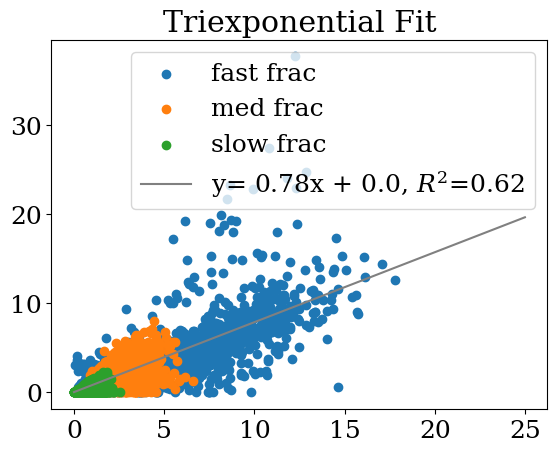

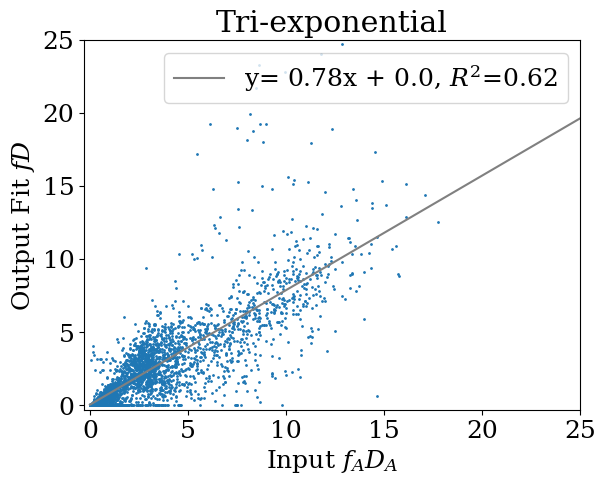

SignificanceResult(statistic=0.8053036534781836, pvalue=0.0)
All fD difference = -0.00074 ± 0.00207, 32.41997%
fast fD mean difference = -1.44144± 3.13784, 31.75347%
med fD mean difference = -0.37697± 1.41393, 30.39212%
slow fD mean difference = -0.39084± 0.52737, 36.55285%
relative percent difference
fast fD  -28.65651%
med fD -10.93348%
slow fD -36.19625%
mean relative percent difference
fast fD  -33.97532%
med fD -22.14422%
slow fD -75.89312%

median abs percent difference
fast fD  36.87973%
med fD 30.77131%
slow fD 39.66814%

percent bland altman
fast fD BA, -1.441, [-7.592-4.709]
fast fD %BA, -23.362%, [-123.040%-76.316%]

med fD BA, -0.377, [-3.148-2.394]
med fD %BA, -13.264%, [-110.774%-84.247%]

slow fD BA, -0.391, [-1.424-0.643]
slow fD %BA, -55.705%, [-203.027%-91.617%]

all fD BA, -0.736, [-4.796-3.323]
all fD %BA, -22.744%, [-148.117%-102.630%]

3.0 0.0
now just f and D independently


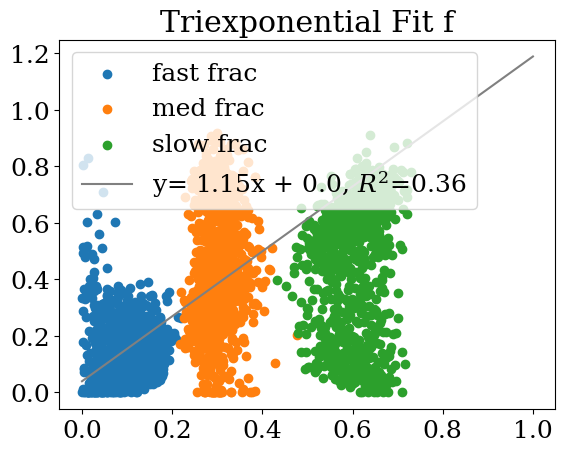

relative percent difference
fast D  7.19580%
med D 15.88011%
slow D -6.72211%

relative abs percent difference
fast D  61.56069%
med D 33.22536%
slow D 14.14385%

percent bland altman
fast f BA, 0.039, [-0.193-0.271]
fast f %BA, 33.136%, [-164.620%-230.892%]

med f BA, 0.100, [-0.296-0.496]
med f %BA, 28.527%, [-84.122%-141.176%]

slow f BA, -0.139, [-0.586-0.308]
slow f %BA, -26.203%, [-110.367%-57.960%]



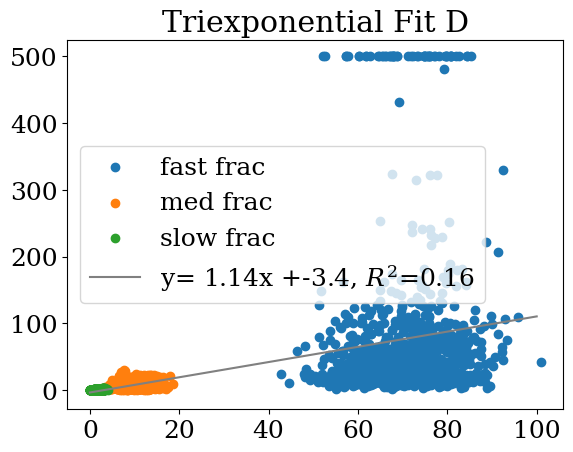

relative percent difference
fast D  -55.37316%
med D -28.51079%
slow D -26.85309%

relative abs percent difference
fast D  72.04335%
med D 42.74596%
slow D 28.19332%

percent bland altman
fast D BA, 6.391, [-216.898-229.680]
fast D %BA, 8.689%, [-294.893%-312.271%]

med D BA, -1.903, [-11.651-7.845]
med D %BA, -20.927%, [-128.110%-86.257%]

slow D BA, -0.631, [-2.157-0.894]
slow D %BA, -53.670%, [-183.361%-76.021%]



In [10]:
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExpSimulatedCurves_anomalous_12172024_3comp.xlsx'
df_TrueParams = pd.read_excel(fileloc,sheet_name = 'Parameters') 
df_TrueParams=df_TrueParams.rename(columns={c: 'true '+c for c in df_TrueParams.columns if c not in ['Run Number', 'Unnamed']})
df_TrueParams=df_TrueParams.rename(columns={c: c+'tion' for c in df_TrueParams.columns if 'frac' in c})

df_AveragedNoise = pd.read_excel(fileloc,sheet_name = 'AveragedNoise_SNR_50') 
#Truth=Truth.rename(columns={c: 'True '+c for c in Truth.columns if c not in ['Run Number', 'Unnamed']})

# trying tri-exp fit to the df_True
b_values11 = np.array([0,10,30,50,80,120,200,400,800])#, 1100, 1380]) # medium range 11 b values 0 - 1380

TrueFracs = []
TrueDiffs = []
TrueGammas = []
FitFracs = []
FitDiffs = []
r2_fit=[]
compartment_number=[]
for j in range(1000):
    #norm = df_TrueParams['true fast fraction'].iloc[j]+df_TrueParams['true med fraction'].iloc[j]+df_TrueParams['true slow fraction'].iloc[j]
    #pl.plot(b_values11,df_True.iloc[j,1:]/norm)
    #pl.scatter(b_values11,triexp_func(b_values11, df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j],df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]))
    popt, pcov = curve_fit(triexp_func, b_values11,df_AveragedNoise.iloc[j,2:],p0=[.1,.2,.7, 0.1, 0.01, 0.001],bounds=(0, [1,1,1,.5,.1,.1]),maxfev=10000)
    #pl.scatter(b_values11,triexp_func(b_values11,*popt))
    
    ## order popt from fast to slow diffusion
    norm_popt = popt[0]+popt[1]+popt[2]
    idx_sort = popt[3:6].argsort()
    fracs = popt[0:3]/norm_popt
    diffusions = popt[3:6]
    fracs=fracs[idx_sort[::-1]]
    diffusions=diffusions[idx_sort[::-1]]
    #print(*[df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j],df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]])
    
    ## order given true values from fast to slow just in case
    givengammas = np.array([df_TrueParams['true fast gamma'].iloc[j],df_TrueParams['true med gamma'].iloc[j],df_TrueParams['true slow gamma'].iloc[j]])
    givenfracs = np.array([df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j]])
    givendiffusions = np.array([df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]])
    idx_sort = givendiffusions.argsort()
    givenfracs = givenfracs[idx_sort[::-1]]
    givendiffusions = givendiffusions[idx_sort[::-1]]

    TrueFracs.append(list(givenfracs))
    TrueDiffs.append(list(givendiffusions))
    FitFracs.append(list(fracs))
    FitDiffs.append(list(diffusions))
    TrueGammas.append(list(givengammas))

    comp_num = 3-np.count_nonzero(FitFracs==0) #how many compartments with fraction=0
    compartment_number.append(comp_num)
    y_pred = triexp_func(b_values11, *popt)
    r2_goodness = r2_score(df_AveragedNoise.iloc[j,2:], y_pred)
    r2_fit.append(r2_goodness)
    
print(f'goodness of fit: r2={np.mean(r2_fit):.5f}±{np.std(r2_fit):.5f}') 

TruefastfDs= 1000*np.array(TrueFracs)[:,0]*((np.array(TrueDiffs)[:,0]))#**(1/np.array(TrueGammas)[:,0])))
FitfastfDs = 1000*np.array(FitFracs)[:,0]*np.array(FitDiffs)[:,0]

TruemedfDs= 1000*np.array(TrueFracs)[:,1]*(np.array(TrueDiffs)[:,1])#**(1/np.array(TrueGammas)[:,1]))
FitmedfDs = 1000*np.array(FitFracs)[:,1]*np.array(FitDiffs)[:,1]

TrueslowfDs= 1000*np.array(TrueFracs)[:,2]*(np.array(TrueDiffs)[:,2])#**(1/np.array(TrueGammas)[:,2])) #setting it to zero
FitslowfDs = 1000*np.array(FitFracs)[:,2]*np.array(FitDiffs)[:,2]


#pl.scatter(1000*np.array(TrueFracs)[:,0]*np.array(TrueDiffs)[:,0], 1000*np.array(FitFracs)[:,0]*np.array(FitDiffs)[:,0],label= 'fast frac')
#pl.scatter(1000*np.array(TrueFracs)[:,1]*np.array(TrueDiffs)[:,1], 1000*np.array(FitFracs)[:,1]*np.array(FitDiffs)[:,1],label= 'med frac')
#pl.scatter(1000*np.array(TrueFracs)[:,2]*np.array(TrueDiffs)[:,2], 1000*np.array(FitFracs)[:,2]*np.array(FitDiffs)[:,2],label= 'slow frac')


pl.scatter(TruefastfDs, FitfastfDs,label= 'fast frac')
pl.scatter(TruemedfDs,FitmedfDs,label= 'med frac')
pl.scatter(TrueslowfDs, FitslowfDs,label= 'slow frac')


AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))


x = np.linspace(0,25,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('Triexponential Fit')
pl.show()

pl.scatter(AllTruefD, allFitfD, s=1)
x = np.linspace(0,25,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('Tri-exponential')
pl.xlabel('Input $f_AD_A$')
pl.ylabel('Output Fit $fD$')
pl.xlim(-0.3,25)
pl.ylim(-0.3,25)
pl.show()


print(scipy.stats.spearmanr((np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1), (np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)))
print(f'All fD difference = {np.mean((np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)-(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)):.5f} ± {np.std((np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)-(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)):.5f}, {100*np.median(np.abs(((np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)-(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)))/(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)):.5f}%')
print(f'fast fD mean difference = {np.mean(FitfastfDs-TruefastfDs):.5f}± {np.std(FitfastfDs-TruefastfDs):.5f}, {100*np.median(np.abs((FitfastfDs-TruefastfDs))/TruefastfDs):.5f}%')
print(f'med fD mean difference = {np.mean(FitmedfDs-TruemedfDs):.5f}± {np.std(FitmedfDs-TruemedfDs):.5f}, {100*np.median(np.abs((FitmedfDs-TruemedfDs))/TruemedfDs):.5f}%')
print(f'slow fD mean difference = {np.mean(FitslowfDs-TrueslowfDs):.5f}± {np.std(FitslowfDs-TrueslowfDs):.5f}, {100*np.median(np.abs((FitslowfDs-TrueslowfDs))/TrueslowfDs):.5f}%')



print('relative percent difference')
print(f'fast fD  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow fD {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')

print('mean relative percent difference')
print(f'fast fD  {200*np.mean((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.mean((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow fD {200*np.mean((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


print('\nmedian abs percent difference')
print(f'fast fD  {200*np.median(abs(FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.median(abs(FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow fD {200*np.median(abs(FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


print('\npercent bland altman')
blandalt_calc(FitfastfDs,TruefastfDs,'fast fD')
blandalt_calc(FitmedfDs,TruemedfDs,'med fD')
blandalt_calc(FitslowfDs,TrueslowfDs,'slow fD')
blandalt_calc(allFitfD,AllTruefD,'all fD')



print(np.mean(compartment_number), np.std(compartment_number))



print('now just f and D independently')


TruefastfDs= np.array(TrueFracs)[:,0]#*((np.array(TrueDiffs)[:,0]**(1/np.array(TrueGammas)[:,0])))
FitfastfDs = np.array(FitFracs)[:,0]#*np.array(FitDiffs)[:,0]

TruemedfDs=np.array(TrueFracs)[:,1]#*(np.array(TrueDiffs)[:,1]**(1/np.array(TrueGammas)[:,1]))
FitmedfDs = np.array(FitFracs)[:,1]#*np.array(FitDiffs)[:,1]

TrueslowfDs= np.array(TrueFracs)[:,2]#*(np.array(TrueDiffs)[:,1]**(1/np.array(TrueGammas)[:,0])) #setting it to zero
FitslowfDs = np.array(FitFracs)[:,2]#*np.array(FitDiffs)[:,2]



AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs))#+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs))#+list(FitslowfDs))


pl.scatter(TruefastfDs, FitfastfDs,label= 'fast frac')
pl.scatter(TruemedfDs,FitmedfDs,label= 'med frac')
pl.scatter(TrueslowfDs, FitslowfDs,label= 'slow frac')

x = np.linspace(0,1,100)
#slope, intercept, r_value, p_value, std_err = scipy.stats.linregress((np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1), (np.array(FitFracs)*np.array(FitDiffs)).reshape(-1))

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('Triexponential Fit f')
pl.show()


print('relative percent difference')
print(f'fast D  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med D {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow D {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')

print('\nrelative abs percent difference')
print(f'fast D  {200*np.median(abs(FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med D {200*np.median(abs(FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow D {200*np.median(abs(FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')




print('\npercent bland altman')
blandalt_calc(FitfastfDs,TruefastfDs,'fast f')
blandalt_calc(FitmedfDs,TruemedfDs,'med f')
blandalt_calc(FitslowfDs,TrueslowfDs,'slow f')



TruefastfDs= 1000*((np.array(TrueDiffs)[:,0]))#**(1/np.array(TrueGammas)[:,0])))
FitfastfDs = 1000*np.array(FitDiffs)[:,0]

TruemedfDs= 1000*(np.array(TrueDiffs)[:,1])#**(1/np.array(TrueGammas)[:,1]))
FitmedfDs = 1000*np.array(FitDiffs)[:,1]

TrueslowfDs= 1000*(np.array(TrueDiffs)[:,2])#**(1/np.array(TrueGammas)[:,2])) 
FitslowfDs = 1000*np.array(FitDiffs)[:,2]



AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs))#+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs))#+list(FitslowfDs))


pl.scatter(TruefastfDs, FitfastfDs,label= 'fast frac')
pl.scatter(TruemedfDs,FitmedfDs,label= 'med frac')
pl.scatter(TrueslowfDs, FitslowfDs,label= 'slow frac')

x = np.linspace(0,100,100)
#slope, intercept, r_value, p_value, std_err = scipy.stats.linregress((np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1), (np.array(FitFracs)*np.array(FitDiffs)).reshape(-1))

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('Triexponential Fit D')
pl.show()


print('relative percent difference')
print(f'fast D  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med D {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow D {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


print('\nrelative abs percent difference')
print(f'fast D  {200*np.median(abs(FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med D {200*np.median(abs(FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow D {200*np.median(abs(FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')




print('\npercent bland altman')
blandalt_calc(FitfastfDs,TruefastfDs,'fast D')
blandalt_calc(FitmedfDs,TruemedfDs,'med D')
blandalt_calc(FitslowfDs,TrueslowfDs,'slow D')




# now bi-exponential Gaussian 3 component

goodness of fit: r2=0.99227±0.00780


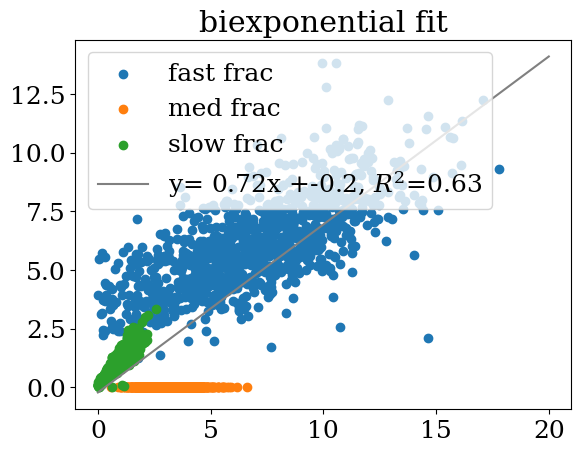

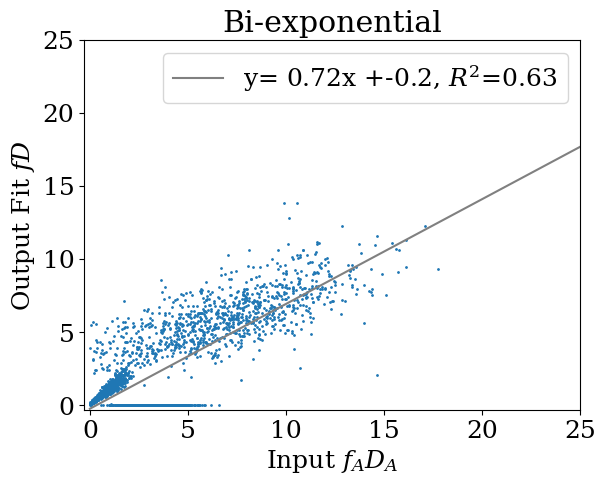

relative percent difference
fast fD  -12.76520%
med fD -200.00000%
slow fD 14.74239%

 relative abs percent difference
fast fD  27.59213%
med fD 200.00000%
slow fD 16.93261%

percent bland altman
fast fD BA, -0.863, [-5.499-3.773]
fast fD %BA, -13.363%, [-85.141%-58.414%]

med fD BA, -3.031, [-4.706--1.355]
med fD %BA, -200.000%, [-310.551%--89.449%]

slow fD BA, 0.142, [-0.264-0.547]
slow fD %BA, 14.654%, [-27.247%-56.554%]

all fD BA, -1.251, [-5.109-2.608]
all fD %BA, -41.956%, [-171.397%-87.485%]

individual f and D


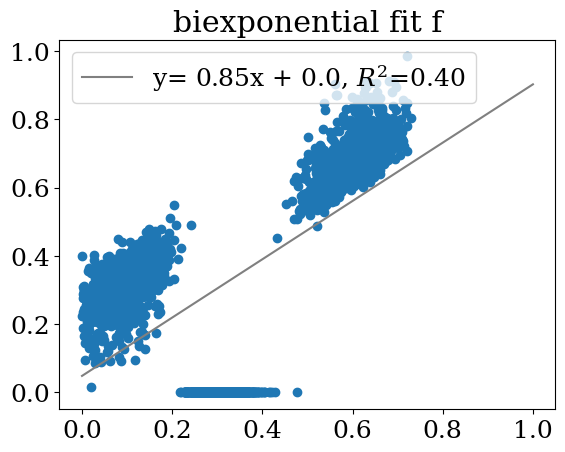

relative percent difference
fast fD  103.53353%
med fD -200.00000%
slow fD 11.93636%

relative abs percent difference
fast fD  103.53353%
med fD -200.00000%
slow fD 11.93636%

percent bland altman
fast f BA, 0.215, [0.097-0.332]
fast f %BA, 104.602%, [47.402%-161.802%]

med f BA, -0.301, [-0.371--0.231]
med f %BA, -200.000%, [-246.453%--153.547%]

slow f BA, 0.087, [-0.019-0.192]
slow f %BA, 13.462%, [-2.955%-29.878%]



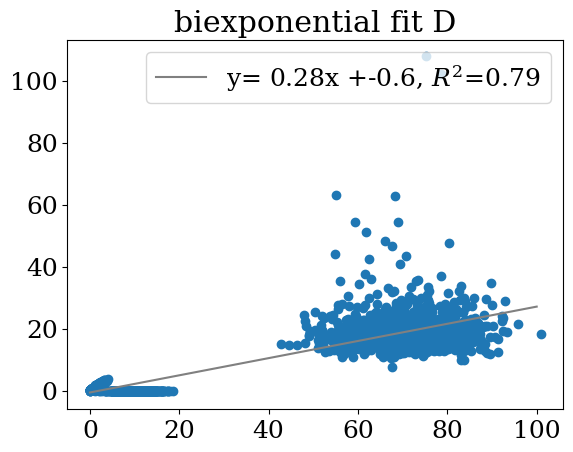

relative percent difference
fast fD  -115.87702%
med fD -200.00000%
slow fD 1.93209%
relative abs percent difference
fast fD  115.87702%
med fD 200.00000%
slow fD 7.96884%

percent bland altman
fast D BA, -50.817, [-72.592--29.042]
fast D %BA, -113.059%, [-161.506%--64.613%]

med D BA, -10.046, [-14.925--5.167]
med D %BA, -200.000%, [-297.140%--102.860%]

slow D BA, 0.003, [-0.384-0.391]
slow D %BA, 0.232%, [-25.680%-26.143%]



In [12]:
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExpSimulatedCurves_anomalous_12172024_3comp.xlsx'
df_True = pd.read_excel(fileloc,sheet_name = 'TrueData_SNR_50') 

df_TrueParams = pd.read_excel(fileloc,sheet_name = 'Parameters') 
df_TrueParams=df_TrueParams.rename(columns={c: 'true '+c for c in df_TrueParams.columns if c not in ['Run Number', 'Unnamed']})
df_TrueParams=df_TrueParams.rename(columns={c: c+'tion' for c in df_TrueParams.columns if 'frac' in c})

df_AveragedNoise = pd.read_excel(fileloc,sheet_name = 'AveragedNoise_SNR_50') 
#Truth=Truth.rename(columns={c: 'True '+c for c in Truth.columns if c not in ['Run Number', 'Unnamed']})

# trying tri-exp fit to the df_True
b_values11 = np.array([0,10,30,50,80,120,200,400,800])#, 1100, 1380]) # medium range 11 b values 0 - 1380

# trying bi-exp fit to the df_True
TrueFracs = []
TrueDiffs = []
TrueGammas = []
FitFracs = []
FitDiffs = []
r2_fit = []
compartment_number=[]
for j in range(1000):
    #popt, pcov = curve_fit(biexp_func, b_values11,df_AveragedNoise.iloc[j,2:-2],p0=[.1,.7, 0.1, 0.001],bounds=(0, [1,1,.1,.1]),maxfev=10000)
    
    ## order popt from fast to slow diffusion
    #norm_popt = popt[0]+popt[1]
    #idx_sort = popt[2:4].argsort()
    #fracs = popt[0:2]/norm_popt
    #diffusions = popt[2:4]
    #fracs=fracs[idx_sort[::-1]]
    #diffusions=diffusions[idx_sort[::-1]]
    #print(*[df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j],df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]])
    
    
    ## two step fit
    
    # fit slow
    popt1, pcov = curve_fit(monoexp_func, b_values11[6:],df_AveragedNoise.iloc[j,8:],p0=[.7, 0.001],bounds=(0, [1,.1]),maxfev=10000)

    #pl.plot(b_values11, monoexp_func(b_values11, popt1[0], popt1[1]))
    #pl.scatter(b_values11,df_True.iloc[j,2:-2])
    
    # subtract slow fit
    popt2, pcov = curve_fit(monoexp_func, b_values11,df_AveragedNoise.iloc[j,2:]-monoexp_func(b_values11,popt1[0], popt1[1]),p0=[.1, 0.01],bounds=(0, [1,.2]),maxfev=10000)

    
    ## order popt from fast to slow diffusion
    norm_popt = popt1[0]+popt2[0]
    diffusions = [popt2[1], popt1[1]]
    fracs=[popt2[0], popt1[0]]/norm_popt
    #print(*[df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j],df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]])
    #pl.plot(b_values11, biexp_func(b_values11, fracs[0], fracs[1], diffusions[0], diffusions[1]))
    #pl.scatter(b_values11,df_True.iloc[j,2:-2])
    
    
    ## order given true values from fast to slow just in case
    givengammas = np.array([df_TrueParams['true fast gamma'].iloc[j],df_TrueParams['true med gamma'].iloc[j],df_TrueParams['true slow gamma'].iloc[j]])
    givenfracs = np.array([df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j]])
    givendiffusions = np.array([df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]])
    idx_sort = givendiffusions.argsort()
    givenfracs = givenfracs[idx_sort[::-1]]
    givendiffusions = givendiffusions[idx_sort[::-1]]

    TrueFracs.append(list(givenfracs))
    TrueDiffs.append(list(givendiffusions))
    FitFracs.append(list(fracs))
    FitDiffs.append(list(diffusions))
    TrueGammas.append(list(givengammas))
  
    
    y_pred = biexp_func(b_values11, fracs[0], fracs[1], diffusions[0], diffusions[1])
    r2_goodness = r2_score(df_AveragedNoise.iloc[j,2:], y_pred)
    if r2_goodness>0:
        r2_fit.append(r2_goodness)
    else:
        r2_fit.append(0)
    
print(f'goodness of fit: r2={np.mean(r2_fit):.5f}±{np.std(r2_fit):.5f}') 
TruefastfDs= 1000*np.array(TrueFracs)[:,0]*((np.array(TrueDiffs)[:,0]))#**(1/np.array(TrueGammas)[:,0])))
FitfastfDs = 1000*np.array(FitFracs)[:,0]*np.array(FitDiffs)[:,0]

TruemedfDs= 1000*np.array(TrueFracs)[:,1]*(np.array(TrueDiffs)[:,1])#**(1/np.array(TrueGammas)[:,1]))
FitmedfDs = 0*np.array(FitFracs)[:,1]*np.array(FitDiffs)[:,1]

TrueslowfDs= 1000*np.array(TrueFracs)[:,2]*(np.array(TrueDiffs)[:,2])#**(1/np.array(TrueGammas)[:,2])) #setting it to zero
FitslowfDs = 1000*np.array(FitFracs)[:,1]*np.array(FitDiffs)[:,1]



AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))


pl.scatter(TruefastfDs, FitfastfDs,label= 'fast frac')
pl.scatter(TruemedfDs,FitmedfDs,label= 'med frac')
pl.scatter(TrueslowfDs, FitslowfDs,label= 'slow frac')

x = np.linspace(0,20,100)
#slope, intercept, r_value, p_value, std_err = scipy.stats.linregress((np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1), (np.array(FitFracs)*np.array(FitDiffs)).reshape(-1))

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)

r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('biexponential fit')
pl.show()

pl.scatter(AllTruefD, allFitfD, s=1)
x = np.linspace(0,25,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('Bi-exponential')
pl.xlabel('Input $f_AD_A$')
pl.ylabel('Output Fit $fD$')
pl.xlim(-0.3,25)
pl.ylim(-0.3,25)
pl.show()



print('relative percent difference')
print(f'fast fD  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.median((0-TruemedfDs)/(TruemedfDs + 0)):.5f}%')
print(f'slow fD {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


print('\n relative abs percent difference')
print(f'fast fD  {200*np.median(abs(FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.median(abs(0-TruemedfDs)/(TruemedfDs + 0)):.5f}%')
print(f'slow fD {200*np.median(abs(FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')



print('\npercent bland altman')
blandalt_calc(FitfastfDs,TruefastfDs,'fast fD')
blandalt_calc(FitmedfDs,TruemedfDs,'med fD')
blandalt_calc(FitslowfDs,TrueslowfDs,'slow fD')
blandalt_calc(allFitfD,AllTruefD,'all fD')







print('individual f and D')


TruefastfDs= np.array(TrueFracs)[:,0]#*((np.array(TrueDiffs)[:,0]**(1/np.array(TrueGammas)[:,0])))
FitfastfDs = np.array(FitFracs)[:,0]#*np.array(FitDiffs)[:,0]

TruemedfDs= 1*np.array(TrueFracs)[:,1]#*(np.array(TrueDiffs)[:,1]**(1/np.array(TrueGammas)[:,1]))
FitmedfDs = 0*np.array(FitFracs)[:,1]#*np.array(FitDiffs)[:,1]

TrueslowfDs= 1*np.array(TrueFracs)[:,2]#*(np.array(TrueDiffs)[:,2]**(1/np.array(TrueGammas)[:,2])) #setting it to zero
FitslowfDs = 1*np.array(FitFracs)[:,1]#*np.array(FitDiffs)[:,1]



AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))



x = np.linspace(0,1,100)
#slope, intercept, r_value, p_value, std_err = scipy.stats.linregress((np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1), (np.array(FitFracs)*np.array(FitDiffs)).reshape(-1))

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)

pl.scatter(AllTruefD,allFitfD)

r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('biexponential fit f')
pl.show()
print('relative percent difference')
print(f'fast fD  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow fD {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


print('\nrelative abs percent difference')
print(f'fast fD  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow fD {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')




print('\npercent bland altman')
blandalt_calc(FitfastfDs,TruefastfDs,'fast f')
blandalt_calc(FitmedfDs,TruemedfDs,'med f')
blandalt_calc(FitslowfDs,TrueslowfDs,'slow f')



TruefastfDs= 1000*((np.array(TrueDiffs)[:,0]))#**(1/np.array(TrueGammas)[:,0])))
FitfastfDs = 1000*np.array(FitDiffs)[:,0]

TruemedfDs= 1000*(np.array(TrueDiffs)[:,1])#**(1/np.array(TrueGammas)[:,1]))
FitmedfDs = 0*np.array(FitDiffs)[:,1]

TrueslowfDs= 1000*(np.array(TrueDiffs)[:,2])#**(1/np.array(TrueGammas)[:,2])) #setting it to zero
FitslowfDs = 1000*np.array(FitDiffs)[:,1]



AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))



x = np.linspace(0,100,100)
#slope, intercept, r_value, p_value, std_err = scipy.stats.linregress((np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1), (np.array(FitFracs)*np.array(FitDiffs)).reshape(-1))

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)

pl.scatter(AllTruefD,allFitfD)

r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('biexponential fit D')
pl.show()
print('relative percent difference')
print(f'fast fD  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow fD {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')

print('relative abs percent difference')
print(f'fast fD  {200*np.median(np.abs(FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.median(np.abs(FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow fD {200*np.median(np.abs(FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')




print('\npercent bland altman')
blandalt_calc(FitfastfDs,TruefastfDs,'fast D')
blandalt_calc(FitmedfDs,TruemedfDs,'med D')
blandalt_calc(FitslowfDs,TrueslowfDs,'slow D')




# now two compartment 


# spectral Gaussian 2 component

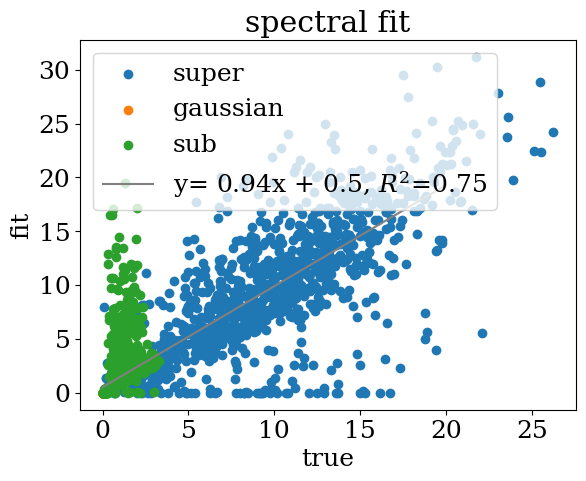

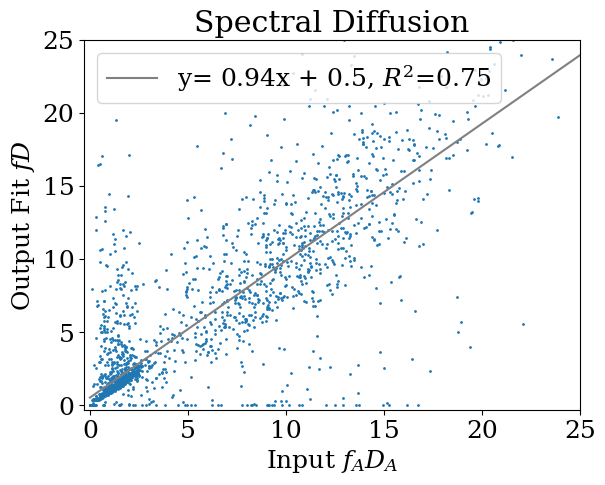

SignificanceResult(statistic=0.9169790274715937, pvalue=0.0)
All fD difference = 0.29212 ± 2.84152, nan%
fast fD difference = -0.07640 ± 4.20224, -0.34322%
med fD difference = 0.00000 ± 0.00000, nan%
slow fD difference = 0.95277 ± 2.43027, 2.68800%
relative percent difference
fast fD  -0.34381%
med fD nan%
slow fD 2.65235%

relative abs percent difference
fast fD  23.56277%
med fD nan%
slow fD 12.67234%

percent bland altman
fast fD BA, -0.076, [-8.313-8.160]
fast fD %BA, -0.758%, [-82.494%-80.977%]

med fD BA, 0.000, [0.000-0.000]
med fD %BA, nan%, [nan%-nan%]

slow fD BA, 0.953, [-3.811-5.716]
slow fD %BA, 53.858%, [-215.402%-323.118%]

all fD BA, 0.292, [-5.277-5.861]
all fD %BA, 7.398%, [-133.647%-148.443%]



now just f and D independently


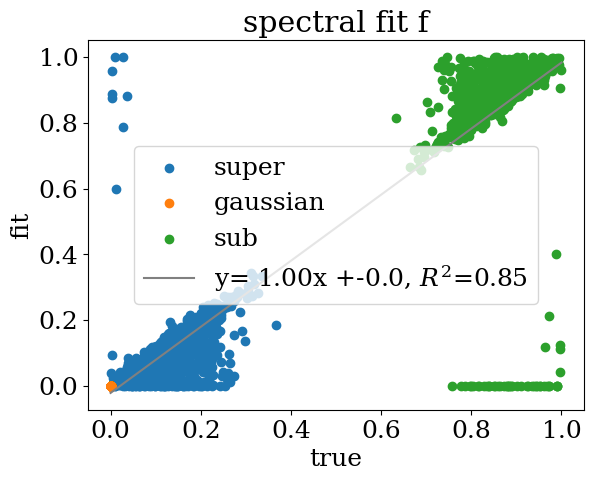

0.9638958333648068 0.16296201737152619
1.922 0.3845984919367197
relative percent difference
fast f  -13.44077%
med f nan%
slow f 1.64271%

relative abs percent difference
fast f  16.90094%
med f nan%
slow f 2.36382%

percent bland altman
fast f BA, -0.027, [-0.214-0.160]
fast f %BA, -20.792%, [-164.488%-122.905%]

med f BA, 0.000, [0.000-0.000]
med f %BA, nan%, [nan%-nan%]

slow f BA, -0.011, [-0.397-0.375]
slow f %BA, -1.281%, [-46.648%-44.086%]



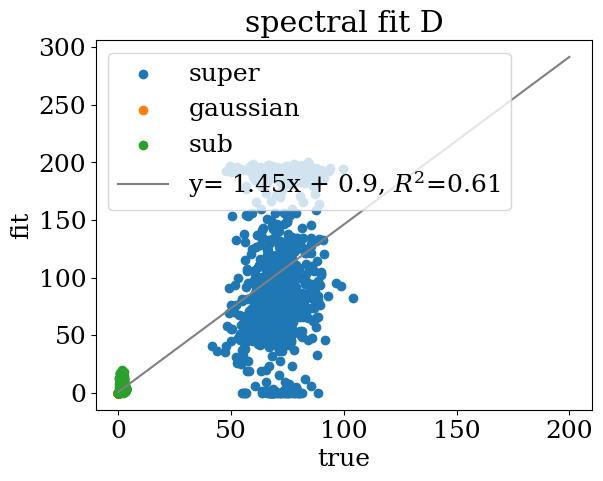

relative percent difference
fast D  20.68357%
med D nan%
slow D 1.44360%

relative abs percent difference
fast D  36.80111%
med D nan%
slow D 11.42048%

percent bland altman
fast D BA, 33.347, [-79.699-146.393]
fast D %BA, 38.307%, [-91.553%-168.168%]

med D BA, 0.000, [0.000-0.000]
med D %BA, nan%, [nan%-nan%]

slow D BA, 0.961, [-3.875-5.796]
slow D %BA, 48.314%, [-194.859%-291.488%]



In [15]:
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExpSimulatedCurves_anomalous_12172024_2comp.xlsx'
Truth = pd.read_excel(fileloc,sheet_name = 'Parameters') 
Truth=Truth.rename(columns={c: 'true '+c for c in Truth.columns if c not in ['Run Number', 'Unnamed']})
Truth=Truth.rename(columns={c: c+'tion' for c in Truth.columns if 'frac' in c})
#Truth=Truth.rename(columns={c: 'diffusion' for c in Truth.columns if ' D' in c})


fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/Simulated_2peak_AnomalousDiffusionSpectra_Fits_rerun.xlsx'
TrueDataFits = pd.read_excel(fileloc,sheet_name = 'lmd_01_AveragedNoise_SNR_50_s') #s means sorted
TrueDataFits=TrueDataFits.rename(columns={c: 'Fit '+c for c in TrueDataFits.columns if c not in ['Run Number', 'Unnamed']})



df_AveragedData = pd.merge(Truth, TrueDataFits, how = 'inner', left_on=["Run Number"], right_on = ['Run Number'])
df_AveragedData['Fit slow diffusion'] = df_AveragedData['Fit slow diffusion'].fillna(0)

df_AveragedData = CalculatePE_fraction(df_AveragedData, 'fast fraction')
df_AveragedData = CalculatePE_fraction(df_AveragedData, 'med fraction')
df_AveragedData = CalculatePE_fraction(df_AveragedData, 'slow fraction')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'fast diffusion')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'med diffusion')
df_AveragedData = CalculatePE_diffusion(df_AveragedData, 'slow diffusion')


TruefastfDs = 1000*df_AveragedData['true fast fraction']*(df_AveragedData['true fast diffusion'])#**(1/df_AveragedData['true fast gamma']))
TruemedfDs = 1000*df_AveragedData['true med fraction']*(df_AveragedData['true med diffusion'])#**(1/df_AveragedData['true med gamma']))
TrueslowfDs = 1000*df_AveragedData['true slow fraction']*(df_AveragedData['true slow diffusion'])#**(1/df_AveragedData['true slow gamma']))

FitfastfDs = df_AveragedData['Fit fast fraction']*df_AveragedData['Fit fast diffusion']
FitmedfDs = df_AveragedData['Fit med fraction']*df_AveragedData['Fit med diffusion']
FitslowfDs = df_AveragedData['Fit slow fraction']*df_AveragedData['Fit slow diffusion']



pl.scatter(TruefastfDs,FitfastfDs,label='super')
pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
pl.scatter(TrueslowfDs,FitslowfDs,label='sub')


AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))

x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('spectral fit')
pl.xlabel('true')
pl.ylabel('fit')
pl.show()


pl.scatter(AllTruefD, allFitfD, s=1)
x = np.linspace(0,25,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('Spectral Diffusion')
pl.xlabel('Input $f_AD_A$')
pl.ylabel('Output Fit $fD$')
pl.xlim(-0.3,25)
pl.ylim(-0.3,25)
pl.show()


print(scipy.stats.spearmanr(AllTruefD,allFitfD))
print(f'All fD difference = {np.mean(allFitfD - AllTruefD):.5f} ± {np.std(allFitfD - AllTruefD):.5f}, {100*np.median((allFitfD - AllTruefD)/AllTruefD):.5f}%')
print(f'fast fD difference = {np.mean(FitfastfDs - TruefastfDs):.5f} ± {np.std(FitfastfDs - TruefastfDs):.5f}, {100*np.median((FitfastfDs - TruefastfDs)/TruefastfDs):.5f}%')
print(f'med fD difference = {np.mean(FitmedfDs - TruemedfDs):.5f} ± {np.std(FitmedfDs - TruemedfDs):.5f}, {100*np.median((FitmedfDs - TruemedfDs)/TruemedfDs):.5f}%')
print(f'slow fD difference = {np.mean(FitslowfDs - TrueslowfDs):.5f} ± {np.std(FitslowfDs - TrueslowfDs):.5f}, {100*np.median((FitslowfDs - TrueslowfDs)/TrueslowfDs):.5f}%')

print('relative percent difference')
print(f'fast fD  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow fD {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


print('\nrelative abs percent difference')
print(f'fast fD  {200*np.median(abs(FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.median(abs(FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow fD {200*np.median(abs(FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


print('\npercent bland altman')
blandalt_calc(FitfastfDs,TruefastfDs,'fast fD')
blandalt_calc(FitmedfDs,TruemedfDs,'med fD')
blandalt_calc(FitslowfDs,TrueslowfDs,'slow fD')
blandalt_calc(allFitfD,AllTruefD,'all fD')










print('\n\nnow just f and D independently')


TruefastfDs = df_AveragedData['true fast fraction']#*(df_AveragedData['true fast diffusion']**(1/df_AveragedData['true fast gamma']))
TruemedfDs = df_AveragedData['true med fraction']#*(df_AveragedData['true med diffusion']**(1/df_AveragedData['true med gamma']))
TrueslowfDs = df_AveragedData['true slow fraction']#*(df_AveragedData['true slow diffusion']**(1/df_AveragedData['true slow gamma']))

FitfastfDs = df_AveragedData['Fit fast fraction']#*df_AveragedData['Fit fast diffusion']
FitmedfDs = df_AveragedData['Fit med fraction']#*df_AveragedData['Fit med diffusion']
FitslowfDs = df_AveragedData['Fit slow fraction']#*df_AveragedData['Fit slow diffusion']



pl.scatter(TruefastfDs,FitfastfDs,label='super')
pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
pl.scatter(TrueslowfDs,FitslowfDs,label='sub')


AllTruefD = np.array(list(TruefastfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitslowfDs))

x = np.linspace(0,1,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('spectral fit f')
pl.xlabel('true')
pl.ylabel('fit')
pl.show()


TrueDataFits.loc[TrueDataFits['Fit rsq'] < 0, 'Fit rsq'] = 0
print(np.mean(TrueDataFits['Fit rsq']), np.std(TrueDataFits['Fit rsq']))
print(np.mean(TrueDataFits['Fit number of peaks']), np.std(TrueDataFits['Fit number of peaks']))




print('relative percent difference')
print(f'fast f  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med f {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow f {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')

print('\nrelative abs percent difference')
print(f'fast f  {200*np.median(abs(FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med f {200*np.median(abs(FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow f {200*np.median(abs(FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


print('\npercent bland altman')
blandalt_calc(FitfastfDs,TruefastfDs,'fast f')
blandalt_calc(FitmedfDs,TruemedfDs,'med f')
blandalt_calc(FitslowfDs,TrueslowfDs,'slow f')






TruefastfDs = 1000*(df_AveragedData['true fast diffusion'])#**(1/df_AveragedData['true fast gamma']))
TruemedfDs = 1000*(df_AveragedData['true med diffusion'])#**(1/df_AveragedData['true med gamma']))
TrueslowfDs = 1000*(df_AveragedData['true slow diffusion'])#**(1/df_AveragedData['true slow gamma']))

FitfastfDs = df_AveragedData['Fit fast diffusion']
FitmedfDs = df_AveragedData['Fit med diffusion']
FitslowfDs = df_AveragedData['Fit slow diffusion']



pl.scatter(TruefastfDs,FitfastfDs,label='super')
pl.scatter(TruemedfDs,FitmedfDs,label='gaussian')
pl.scatter(TrueslowfDs,FitslowfDs,label='sub')


AllTruefD = np.array(list(TruefastfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitslowfDs))

x = np.linspace(0,200,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('spectral fit D')
pl.xlabel('true')
pl.ylabel('fit')
pl.show()

print('relative percent difference')
print(f'fast D  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med D {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow D {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')




print('\nrelative abs percent difference')
print(f'fast D  {200*np.median(abs(FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med D {200*np.median(abs(FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow D {200*np.median(abs(FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


print('\npercent bland altman')
blandalt_calc(FitfastfDs,TruefastfDs,'fast D')
blandalt_calc(FitmedfDs,TruemedfDs,'med D')
blandalt_calc(FitslowfDs,TrueslowfDs,'slow D')



# tri-exp 2 comp Gaussian

goodness of fit: r2=0.96655±0.16188


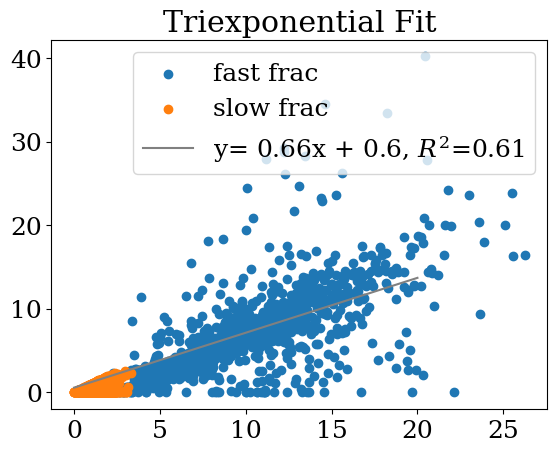

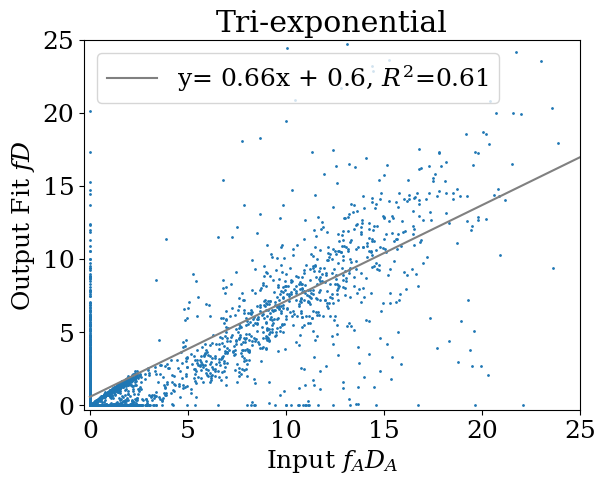

SignificanceResult(statistic=0.6760821183286685, pvalue=0.0)
All fD difference = -0.00073 ± 0.00318, nan%
fast fD mean difference = -3.09979± 3.95375, 37.24315%
med fD mean difference = 1.58001± 2.28092, nan%
slow fD mean difference = -0.66557± 0.71426, 23.12510%
relative percent difference
fast fD  -42.35426%
med fD nan%
slow fD -25.68159%

relative abs percent difference
fast fD  45.06683%
med fD nan%
slow fD 26.14861%

percent bland altman
fast fD BA, -3.100, [-10.849-4.650]
fast fD %BA, -36.191%, [-126.666%-54.285%]

med fD BA, 1.580, [-2.891-6.051]
med fD %BA, 200.000%, [-365.898%-765.898%]

slow fD BA, -0.666, [-2.066-0.734]
slow fD %BA, -69.340%, [-215.187%-76.507%]

all fD BA, -0.728, [-7.160-5.703]
all fD %BA, -21.186%, [-208.234%-165.862%]

now just f and D independently


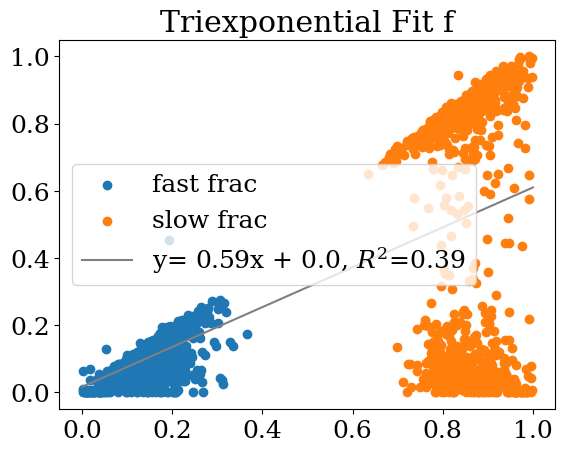

relative percent difference
fast D  -28.57483%
med D nan%
slow D -6.12031%

relative abs percent difference
fast f  29.15946%
med f nan%
slow f 6.16424%

percent bland altman
fast f BA, -0.046, [-0.142-0.049]
fast f %BA, -38.432%, [-117.524%-40.660%]

med f BA, 0.349, [-0.355-1.054]
med f %BA, 200.000%, [-203.397%-603.397%]

slow f BA, -0.327, [-1.081-0.427]
slow f %BA, -47.185%, [-156.010%-61.640%]



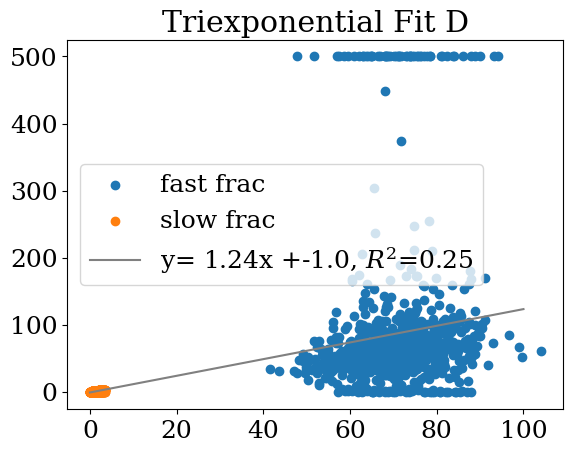

relative percent difference
fast D  -14.69202%
med D nan%
slow D -14.57724%

relative abs percent difference
fast D  30.11879%
med D nan%
slow D 14.76745%

percent bland altman
fast D BA, 16.124, [-191.646-223.894]
fast D %BA, 20.556%, [-244.323%-285.434%]

med D BA, 11.986, [-25.022-48.994]
med D %BA, 200.000%, [-417.518%-817.518%]

slow D BA, -0.593, [-2.094-0.908]
slow D %BA, -48.966%, [-172.861%-74.928%]



In [17]:
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExpSimulatedCurves_anomalous_12172024_2comp.xlsx'
df_True = pd.read_excel(fileloc,sheet_name = 'TrueData_SNR_50') 

df_TrueParams = pd.read_excel(fileloc,sheet_name = 'Parameters') 
df_TrueParams=df_TrueParams.rename(columns={c: 'true '+c for c in df_TrueParams.columns if c not in ['Run Number', 'Unnamed']})
df_TrueParams=df_TrueParams.rename(columns={c: c+'tion' for c in df_TrueParams.columns if 'frac' in c})

#df_AveragedData = pd.read_excel(fileloc,sheet_name = 'AveragedNoise_SNR_50') 
#df_AveragedData = df_AveragedData.fillna(0)
df_AveragedNoise = pd.read_excel(fileloc,sheet_name = 'AveragedNoise_SNR_50') 
df_AveragedNoise = df_AveragedNoise.fillna(0)

# trying tri-exp fit to the df_True
b_values11 = np.array([0,10,30,50,80,120,200,400,800])#, 1100, 1380]) # medium range 11 b values 0 - 1380

TrueFracs = []
TrueDiffs = []
TrueGammas = []
FitFracs = []
FitDiffs = []
r2_fit=[]
compartment_number=[]
for j in range(1000):
    #norm = df_TrueParams['true fast fraction'].iloc[j]+df_TrueParams['true med fraction'].iloc[j]+df_TrueParams['true slow fraction'].iloc[j]
    #pl.plot(b_values11,df_True.iloc[j,1:]/norm)
    #pl.scatter(b_values11,triexp_func(b_values11, df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j],df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]))
    try:
        popt, pcov = curve_fit(triexp_func, b_values11,df_AveragedNoise.iloc[j,2:],p0=[.1,.2,.7, 0.1, 0.01, 0.001],bounds=(0, [1,1,1,.5,.1,.1]),maxfev=1000)
        norm_popt = popt[0]+popt[1]+popt[2]
        idx_sort = popt[3:6].argsort()
        fracs = popt[0:3]/norm_popt
        diffusions = popt[3:6]
        fracs=fracs[idx_sort[::-1]]
        diffusions=diffusions[idx_sort[::-1]]
    except RuntimeError:
        popt=np.array([0,0,0,0,0,0])
        ## order popt from fast to slow diffusion
        norm_popt = popt[0]+popt[1]+popt[2]
        idx_sort = popt[3:6].argsort()
        fracs = popt[0:3] #nor normalized, because entire fraction is zero
        diffusions = popt[3:6]
        fracs=fracs[idx_sort[::-1]]
        diffusions=diffusions[idx_sort[::-1]]
        
        
    
    ## order given true values from fast to slow just in case
    givengammas = np.array([df_TrueParams['true fast gamma'].iloc[j],df_TrueParams['true med gamma'].iloc[j],df_TrueParams['true slow gamma'].iloc[j]])
    givenfracs = np.array([df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j]])
    givendiffusions = np.array([df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]])
    idx_sort = givendiffusions.argsort()
    givenfracs = givenfracs[idx_sort[::-1]]
    givendiffusions = givendiffusions[idx_sort[::-1]]

    TrueFracs.append(list(givenfracs))
    TrueDiffs.append(list(givendiffusions))
    TrueGammas.append(list(givengammas))
    FitFracs.append(list(fracs))
    FitDiffs.append(list(diffusions))
    
    comp_num = 3-np.count_nonzero(FitFracs==0) #how many compartments with fraction=0
    compartment_number.append(comp_num)
    
    
    try:
        y_pred = triexp_func(b_values11, *popt)
        r2_goodness = r2_score(df_AveragedNoise.iloc[j,2:], y_pred)
    except:
        r2_goodness=0
    r2_fit.append(r2_goodness)
    
print(f'goodness of fit: r2={np.mean(r2_fit):.5f}±{np.std(r2_fit):.5f}') 

TruefastfDs= 1000*np.array(TrueFracs)[:,0]*((np.array(TrueDiffs)[:,0]))#**(1/np.array(TrueGammas)[:,0])))
FitfastfDs = 1000*np.array(FitFracs)[:,0]*np.array(FitDiffs)[:,0]

TruemedfDs= 0*np.array(TrueFracs)[:,2]*(np.array(TrueDiffs)[:,2])#**(1/np.array(TrueGammas)[:,1]))
FitmedfDs = 1000*np.array(FitFracs)[:,1]*np.array(FitDiffs)[:,1]

TrueslowfDs= 1000*np.array(TrueFracs)[:,1]*(np.array(TrueDiffs)[:,1])#**(1/np.array(TrueGammas)[:,0])) #setting it to zero
FitslowfDs = 1000*np.array(FitFracs)[:,2]*np.array(FitDiffs)[:,2]



AllTruefD = np.array(list(TruefastfDs)+list(TruemedfDs)+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitmedfDs)+list(FitslowfDs))


pl.scatter(TruefastfDs, FitfastfDs,label= 'fast frac')
#pl.scatter(TruemedfDs,FitmedfDs,label= 'med frac')
pl.scatter(TrueslowfDs, FitslowfDs,label= 'slow frac')

x = np.linspace(0,20,100)
#slope, intercept, r_value, p_value, std_err = scipy.stats.linregress((np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1), (np.array(FitFracs)*np.array(FitDiffs)).reshape(-1))

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('Triexponential Fit')
pl.show()





pl.scatter(AllTruefD, allFitfD, s=1)
x = np.linspace(0,25,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('Tri-exponential')
pl.xlabel('Input $f_AD_A$')
pl.ylabel('Output Fit $fD$')
pl.xlim(-0.3,25)
pl.ylim(-0.3,25)
pl.show()


print(scipy.stats.spearmanr((np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1), (np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)))
print(f'All fD difference = {np.mean((np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)-(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)):.5f} ± {np.std((np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)-(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)):.5f}, {100*np.median(np.abs(((np.array(FitFracs)*np.array(FitDiffs)).reshape(-1)-(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)))/(np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1)):.5f}%')
print(f'fast fD mean difference = {np.mean(FitfastfDs-TruefastfDs):.5f}± {np.std(FitfastfDs-TruefastfDs):.5f}, {100*np.median(np.abs((FitfastfDs-TruefastfDs))/TruefastfDs):.5f}%')
print(f'med fD mean difference = {np.mean(FitmedfDs-TruemedfDs):.5f}± {np.std(FitmedfDs-TruemedfDs):.5f}, {100*np.median(np.abs((FitmedfDs-TruemedfDs))/TruemedfDs):.5f}%')
print(f'slow fD mean difference = {np.mean(FitslowfDs-TrueslowfDs):.5f}± {np.std(FitslowfDs-TrueslowfDs):.5f}, {100*np.median(np.abs((FitslowfDs-TrueslowfDs))/TrueslowfDs):.5f}%')


print('relative percent difference')
print(f'fast fD  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow fD {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


print('\nrelative abs percent difference')
print(f'fast fD  {200*np.median(abs(FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.median(abs(FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow fD {200*np.median(abs(FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


print('\npercent bland altman')
blandalt_calc(FitfastfDs,TruefastfDs,'fast fD')
blandalt_calc(FitmedfDs,TruemedfDs,'med fD')
blandalt_calc(FitslowfDs,TrueslowfDs,'slow fD')
blandalt_calc(allFitfD,AllTruefD,'all fD')



print('now just f and D independently')


TruefastfDs= np.array(TrueFracs)[:,0]#*((np.array(TrueDiffs)[:,0]**(1/np.array(TrueGammas)[:,0])))
FitfastfDs = np.array(FitFracs)[:,0]#*np.array(FitDiffs)[:,0]

TruemedfDs=np.array(TrueFracs)[:,2]#*(np.array(TrueDiffs)[:,1]**(1/np.array(TrueGammas)[:,1]))
FitmedfDs = np.array(FitFracs)[:,1]#*np.array(FitDiffs)[:,1]

TrueslowfDs= np.array(TrueFracs)[:,1]#*(np.array(TrueDiffs)[:,1]**(1/np.array(TrueGammas)[:,0])) #setting it to zero
FitslowfDs = np.array(FitFracs)[:,2]#*np.array(FitDiffs)[:,2]



AllTruefD = np.array(list(TruefastfDs)+list(TrueslowfDs))#+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitslowfDs))#+list(FitslowfDs))


pl.scatter(TruefastfDs, FitfastfDs,label= 'fast frac')
#pl.scatter(TruemedfDs,FitmedfDs,label= 'med frac')
pl.scatter(TrueslowfDs, FitslowfDs,label= 'slow frac')

x = np.linspace(0,1,100)
#slope, intercept, r_value, p_value, std_err = scipy.stats.linregress((np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1), (np.array(FitFracs)*np.array(FitDiffs)).reshape(-1))

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('Triexponential Fit f')
pl.show()


print('relative percent difference')
print(f'fast D  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med D {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow D {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')

print('\nrelative abs percent difference')
print(f'fast f  {200*np.median(abs(FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med f {200*np.median(abs(FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow f {200*np.median(abs(FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


print('\npercent bland altman')
blandalt_calc(FitfastfDs,TruefastfDs,'fast f')
blandalt_calc(FitmedfDs,TruemedfDs,'med f')
blandalt_calc(FitslowfDs,TrueslowfDs,'slow f')





TruefastfDs= 1000*((np.array(TrueDiffs)[:,0]))#**(1/np.array(TrueGammas)[:,0])))
FitfastfDs = 1000*np.array(FitDiffs)[:,0]

TruemedfDs= 1000*(np.array(TrueDiffs)[:,2])#**(1/np.array(TrueGammas)[:,1]))
FitmedfDs = 1000*np.array(FitDiffs)[:,1]

TrueslowfDs= 1000*(np.array(TrueDiffs)[:,1])#**(1/np.array(TrueGammas)[:,0])) #setting it to zero
FitslowfDs = 1000*np.array(FitDiffs)[:,2]



AllTruefD = np.array(list(TruefastfDs)+list(TrueslowfDs))#+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitslowfDs))#+list(FitslowfDs))


pl.scatter(TruefastfDs, FitfastfDs,label= 'fast frac')
#pl.scatter(TruemedfDs,FitmedfDs,label= 'med frac')
pl.scatter(TrueslowfDs, FitslowfDs,label= 'slow frac')

x = np.linspace(0,100,100)
#slope, intercept, r_value, p_value, std_err = scipy.stats.linregress((np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1), (np.array(FitFracs)*np.array(FitDiffs)).reshape(-1))

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('Triexponential Fit D')
pl.show()


print('relative percent difference')
print(f'fast D  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med D {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow D {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


print('\nrelative abs percent difference')
print(f'fast D  {200*np.median(abs(FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med D {200*np.median(abs(FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow D {200*np.median(abs(FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


print('\npercent bland altman')
blandalt_calc(FitfastfDs,TruefastfDs,'fast D')
blandalt_calc(FitmedfDs,TruemedfDs,'med D')
blandalt_calc(FitslowfDs,TrueslowfDs,'slow D')




# bi-exp 2 comp Gaussian noise

goodness of fit: r2=0.97381±0.07553


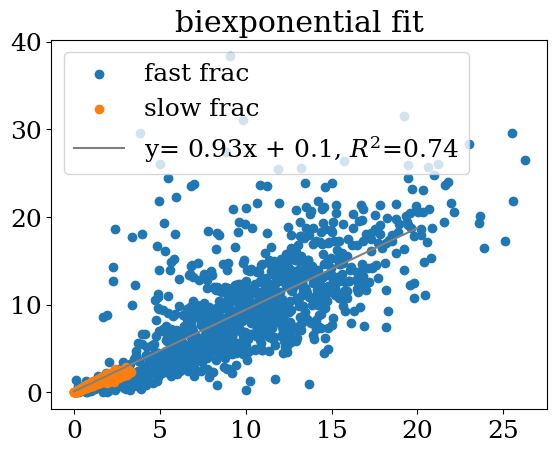

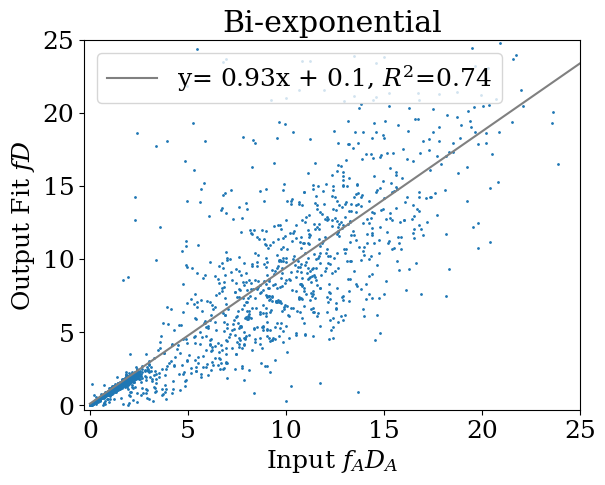

relative percent difference
fast fD  -12.78724%
med fD nan%
slow fD -9.71926%

relative abs percent difference
fast fD  28.00254%
med fD nan%
slow fD 10.52378%

percent bland altman
fast fD BA, -0.418, [-8.973-8.136]
fast fD %BA, -4.221%, [-90.577%-82.135%]

med fD BA, 11.986, [-25.022-48.994]
med fD %BA, 200.000%, [-417.518%-817.518%]

slow fD BA, -0.133, [-0.458-0.192]
slow fD %BA, -10.839%, [-37.325%-15.646%]

all fD BA, -0.276, [-6.335-5.784]
all fD %BA, -4.950%, [-113.818%-103.918%]

individual f and D


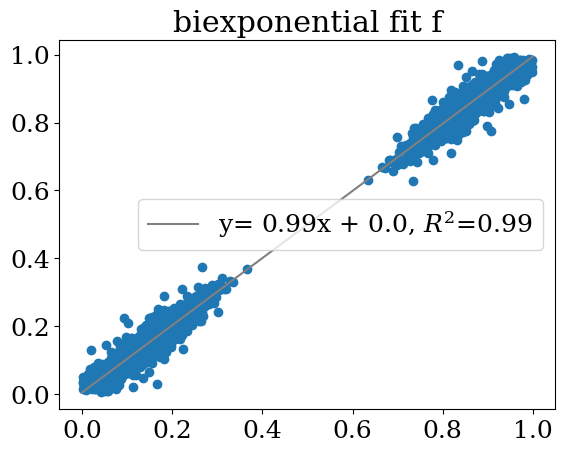

relative percent difference
fast f  2.78626%
med f nan%
slow f -0.52207%

relative abs percent difference
fast f  12.34301%
med f nan%
slow f 1.91928%

percent bland altman
fast f BA, 0.004, [-0.050-0.058]
fast f %BA, 2.613%, [-34.587%-39.814%]

med f BA, 11.986, [-25.022-48.994]
med f %BA, 200.000%, [-417.518%-817.518%]

slow f BA, -0.004, [-0.058-0.050]
slow f %BA, -0.446%, [-6.796%-5.903%]



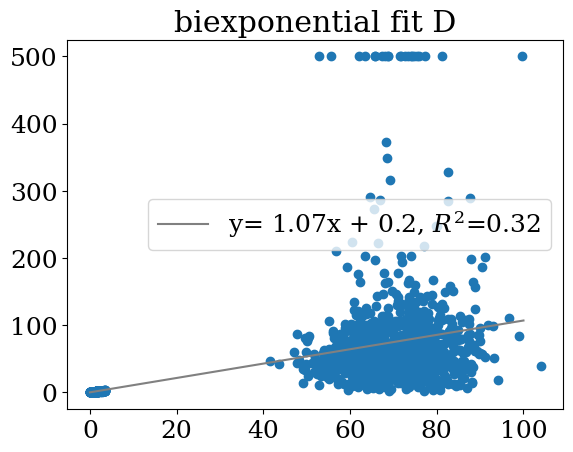

relative percent difference
fast D  -13.97720%
med D nan%
slow D -9.11740%

relative abs percent difference
fast D  36.60689%
med D nan%
slow D 9.42979%

percent bland altman
fast D BA, 5.510, [-144.899-155.920]
fast D %BA, 7.535%, [-198.131%-213.201%]

med D BA, 11.986, [-25.022-48.994]
med D %BA, 200.000%, [-417.518%-817.518%]

slow D BA, -0.147, [-0.449-0.156]
slow D %BA, -10.211%, [-31.319%-10.897%]



In [19]:
fileloc = '/Users/miraliu/Desktop/PostDocCode/Multiexp_Simulations_python/MultiExpSimulatedCurves_anomalous_12172024_2comp.xlsx'

df_TrueParams = pd.read_excel(fileloc,sheet_name = 'Parameters') 
df_TrueParams=df_TrueParams.rename(columns={c: 'true '+c for c in df_TrueParams.columns if c not in ['Run Number', 'Unnamed']})
df_TrueParams=df_TrueParams.rename(columns={c: c+'tion' for c in df_TrueParams.columns if 'frac' in c})

df_AveragedNoise = pd.read_excel(fileloc,sheet_name = 'AveragedNoise_SNR_50') 
df_AveragedNoise = df_AveragedNoise.fillna(0)

# trying tri-exp fit to the df_True
b_values11 = np.array([0,10,30,50,80,120,200,400,800])#, 1100, 1380]) # medium range 11 b values 0 - 1380


# trying bi-exp fit to the df_True
TrueFracs = []
TrueDiffs = []
TrueGammas = []
FitFracs = []
FitDiffs = []
r2_fit = []
compartment_number=[]
for j in range(1000):
    #popt, pcov = curve_fit(biexp_func, b_values11,df_AveragedNoise.iloc[j,2:-2],p0=[.1,.7, 0.1, 0.001],bounds=(0, [1,1,.1,.1]),maxfev=10000)
    
    ## order popt from fast to slow diffusion
    #norm_popt = popt[0]+popt[1]
    #idx_sort = popt[2:4].argsort()
    #fracs = popt[0:2]/norm_popt
    #diffusions = popt[2:4]
    #fracs=fracs[idx_sort[::-1]]
    #diffusions=diffusions[idx_sort[::-1]]
    #print(*[df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j],df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]])
    
    
    ## two step fit
    
    # fit slow
    popt1, pcov = curve_fit(monoexp_func, b_values11[6:],df_AveragedNoise.iloc[j,8:],p0=[.7, 0.001],bounds=(0, [1,.1]),maxfev=10000)

    #pl.plot(b_values11, monoexp_func(b_values11, popt1[0], popt1[1]))
    #pl.scatter(b_values11,df_True.iloc[j,2:-2])
    
    # subtract slow fit
    popt2, pcov = curve_fit(monoexp_func, b_values11,df_AveragedNoise.iloc[j,2:]-monoexp_func(b_values11,popt1[0], popt1[1]),p0=[.1, 0.05],bounds=(0, [1,.5]),maxfev=10000)

    
    ## order popt from fast to slow diffusion
    norm_popt = popt1[0]+popt2[0]
    diffusions = [popt2[1], popt1[1]]
    fracs=[popt2[0], popt1[0]]/norm_popt
    #print(*[df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j],df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]])
    #pl.plot(b_values11, biexp_func(b_values11, fracs[0], fracs[1], diffusions[0], diffusions[1]))
    #pl.scatter(b_values11,df_True.iloc[j,2:-2])
    
    
    ## order given true values from fast to slow just in case
    givengammas = np.array([df_TrueParams['true fast gamma'].iloc[j],df_TrueParams['true med gamma'].iloc[j],df_TrueParams['true slow gamma'].iloc[j]])
    givenfracs = np.array([df_TrueParams['true fast fraction'].iloc[j],df_TrueParams['true med fraction'].iloc[j],df_TrueParams['true slow fraction'].iloc[j]])
    givendiffusions = np.array([df_TrueParams['true fast diffusion'].iloc[j],df_TrueParams['true med diffusion'].iloc[j],df_TrueParams['true slow diffusion'].iloc[j]])
    idx_sort = givendiffusions.argsort()
    givenfracs = givenfracs[idx_sort[::-1]]
    givendiffusions = givendiffusions[idx_sort[::-1]]

    TrueFracs.append(list(givenfracs))
    TrueDiffs.append(list(givendiffusions))
    FitFracs.append(list(fracs))
    FitDiffs.append(list(diffusions))
    TrueGammas.append(list(givengammas))
  
    
    y_pred = biexp_func(b_values11, fracs[0], fracs[1], diffusions[0], diffusions[1])
    r2_goodness = r2_score(df_AveragedNoise.iloc[j,2:], y_pred)
    if r2_goodness>0:
        r2_fit.append(r2_goodness)
    else:
        r2_fit.append(0)
    
print(f'goodness of fit: r2={np.mean(r2_fit):.5f}±{np.std(r2_fit):.5f}') 
TruefastfDs= 1000*np.array(TrueFracs)[:,0]*((np.array(TrueDiffs)[:,0]))#**(1/np.array(TrueGammas)[:,0])))
FitfastfDs = 1000*np.array(FitFracs)[:,0]*np.array(FitDiffs)[:,0]

TrueslowfDs= 1000*np.array(TrueFracs)[:,1]*(np.array(TrueDiffs)[:,1])#**(1/np.array(TrueGammas)[:,1]))
FitslowfDs = 1000*np.array(FitFracs)[:,1]*np.array(FitDiffs)[:,1]

#TrueslowfDs= 0*np.array(TrueFracs)[:,1]*(np.array(TrueDiffs)[:,1]**(1/np.array(TrueGammas)[:,0])) #setting it to zero
#FitslowfDs = 0*np.array(FitFracs)[:,1]*np.array(FitDiffs)[:,1]



AllTruefD = np.array(list(TruefastfDs)+list(TrueslowfDs))#+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitslowfDs))#+list(FitslowfDs))

pl.scatter(TruefastfDs, FitfastfDs,label= 'fast frac')
#pl.scatter(TruemedfDs,FitmedfDs,label= 'med frac')
pl.scatter(TrueslowfDs, FitslowfDs,label= 'slow frac')

x = np.linspace(0,20,100)
#slope, intercept, r_value, p_value, std_err = scipy.stats.linregress((np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1), (np.array(FitFracs)*np.array(FitDiffs)).reshape(-1))

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)

#pl.scatter(AllTruefD,allFitfD)
x = np.linspace(0,20,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('biexponential fit')
pl.show()


pl.scatter(AllTruefD, allFitfD, s=1)
x = np.linspace(0,25,100)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)
r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('Bi-exponential')
pl.xlabel('Input $f_AD_A$')
pl.ylabel('Output Fit $fD$')
pl.xlim(-0.3,25)
pl.ylim(-0.3,25)
pl.show()




print('relative percent difference')
print(f'fast fD  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow fD {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')

print('\nrelative abs percent difference')
print(f'fast fD  {200*np.median(abs(FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med fD {200*np.median(abs(FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow fD {200*np.median(abs(FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


print('\npercent bland altman')
blandalt_calc(FitfastfDs,TruefastfDs,'fast fD')
blandalt_calc(FitmedfDs,TruemedfDs,'med fD')
blandalt_calc(FitslowfDs,TrueslowfDs,'slow fD')
blandalt_calc(allFitfD,AllTruefD,'all fD')





print('individual f and D')



TruefastfDs= np.array(TrueFracs)[:,0]#*((np.array(TrueDiffs)[:,0]**(1/np.array(TrueGammas)[:,0])))
FitfastfDs = np.array(FitFracs)[:,0]#*np.array(FitDiffs)[:,0]

TrueslowfDs= np.array(TrueFracs)[:,1]#*(np.array(TrueDiffs)[:,1]**(1/np.array(TrueGammas)[:,1]))
FitslowfDs = np.array(FitFracs)[:,1]#*np.array(FitDiffs)[:,1]



AllTruefD = np.array(list(TruefastfDs)+list(TrueslowfDs))#+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitslowfDs))#+list(FitslowfDs))


x = np.linspace(0,1,100)
#slope, intercept, r_value, p_value, std_err = scipy.stats.linregress((np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1), (np.array(FitFracs)*np.array(FitDiffs)).reshape(-1))

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)

pl.scatter(AllTruefD,allFitfD)

r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('biexponential fit f')
pl.show()
print('relative percent difference')
print(f'fast f  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med f {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow f {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')



print('\nrelative abs percent difference')
print(f'fast f  {200*np.median(abs(FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med f {200*np.median(abs(FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow f {200*np.median(abs(FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


print('\npercent bland altman')
blandalt_calc(FitfastfDs,TruefastfDs,'fast f')
blandalt_calc(FitmedfDs,TruemedfDs,'med f')
blandalt_calc(FitslowfDs,TrueslowfDs,'slow f')




TruefastfDs= 1000*(np.array(TrueDiffs)[:,0])#**(1/np.array(TrueGammas)[:,0])))
FitfastfDs = 1000*np.array(FitDiffs)[:,0]

TrueslowfDs= 1000*(np.array(TrueDiffs)[:,1])#**(1/np.array(TrueGammas)[:,1]))
FitslowfDs = 1000*np.array(FitDiffs)[:,1]



AllTruefD = np.array(list(TruefastfDs)+list(TrueslowfDs))#+list(TrueslowfDs))
allFitfD = np.array(list(FitfastfDs)+list(FitslowfDs))#+list(FitslowfDs))



x = np.linspace(0,100,100)
#slope, intercept, r_value, p_value, std_err = scipy.stats.linregress((np.array(TrueFracs)*np.array(TrueDiffs)).reshape(-1), (np.array(FitFracs)*np.array(FitDiffs)).reshape(-1))

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(AllTruefD,allFitfD)

pl.scatter(AllTruefD,allFitfD)

r_value2 = r_value**2
pl.plot(x,func(x,slope,intercept),label = f'y= {slope:.2f}x +{intercept: .1f}, $R^2$={r_value2:.2f}',color = 'grey') 
pl.legend()
pl.title('biexponential fit D')
pl.show()
print('relative percent difference')
print(f'fast D  {200*np.median((FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med D {200*np.median((FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow D {200*np.median((FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


print('\nrelative abs percent difference')
print(f'fast D  {200*np.median(abs(FitfastfDs-TruefastfDs)/(TruefastfDs +FitfastfDs )):.5f}%')
print(f'med D {200*np.median(abs(FitmedfDs-TruemedfDs)/(TruemedfDs + FitmedfDs)):.5f}%')
print(f'slow D {200*np.median(abs(FitslowfDs-TrueslowfDs)/(TrueslowfDs + FitslowfDs)):.5f}%')


print('\npercent bland altman')
blandalt_calc(FitfastfDs,TruefastfDs,'fast D')
blandalt_calc(FitmedfDs,TruemedfDs,'med D')
blandalt_calc(FitslowfDs,TrueslowfDs,'slow D')



